# Code Answer

Week 1, Created 2022.03.13 <br>

**NoteBook Author** : [Janghoo Lee](https://www.linkedin.com/in/janghoo-lee-25212a1a0) <br>
🐈 : [ProtossDragoon](https://github.com/ProtossDragoon) <br>
📧 : dlwkdgn3@gmail.com <br>

## 문제7

**출제자** : 이장후

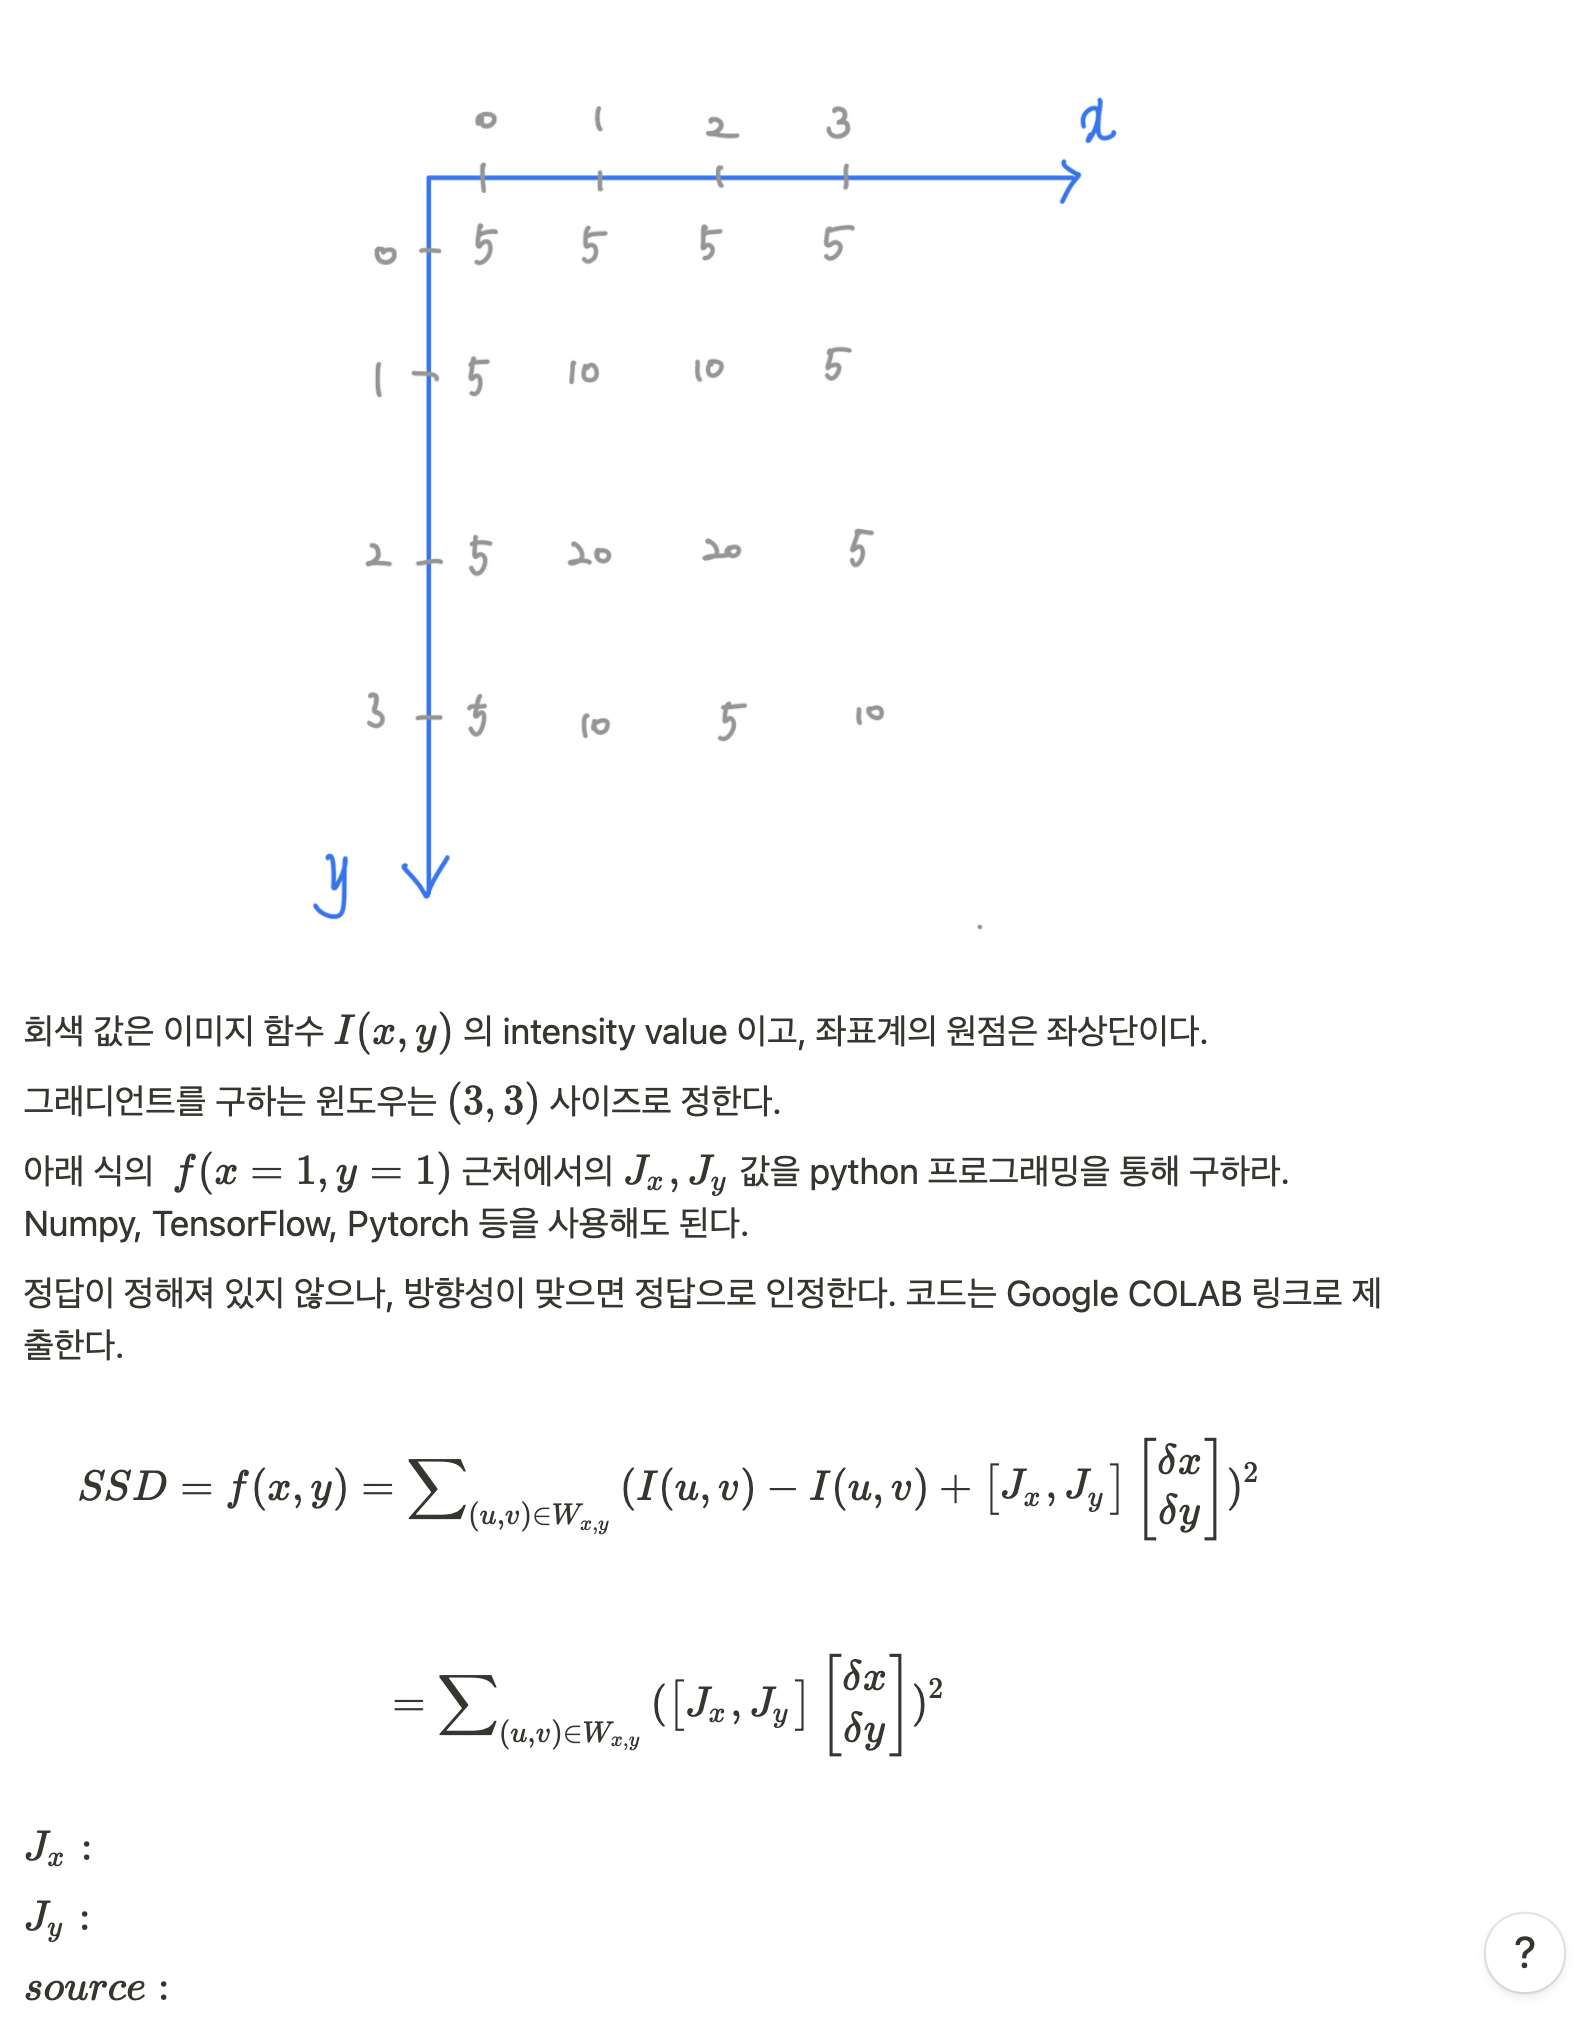

In [1]:
import numpy as np

### Sobel 정의

In [2]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
]) * 1/8
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1],
]) * 1/8
print(f'sobel_x:\n{repr(sobel_x)}\n')
print(f'sobel_y:\n{repr(sobel_y)}\n')

sobel_x:
array([[-0.125,  0.   ,  0.125],
       [-0.25 ,  0.   ,  0.25 ],
       [-0.125,  0.   ,  0.125]])

sobel_y:
array([[-0.125, -0.25 , -0.125],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.125,  0.25 ,  0.125]])



In [3]:
I = np.array([
    [5,  5,  5,  5],
    [5, 10, 10,  5],
    [5, 20, 20,  5],
    [5, 10,  5, 10],
])
print(f'Image function I:\n{I}')

Image function I:
[[ 5  5  5  5]
 [ 5 10 10  5]
 [ 5 20 20  5]
 [ 5 10  5 10]]


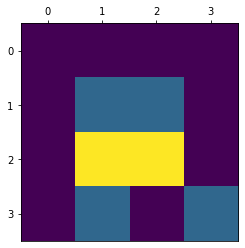

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def draw_im(I):
    plt.gca().invert_yaxis()
    plt.gca().xaxis.set_tick_params(labelbottom=False)
    plt.gca().xaxis.set_tick_params(labeltop=True)
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.imshow(I)

plt.figure()
draw_im(I)

### J 정의

In [5]:
def dz_dx(u, v):
    """
    (u, v) 의 위치에서 x 축 방향의 변화에 따른 z 값의 변화량을 계산합니다.

    params
        u (int): 좌표
        v (int): 좌표
        
    returns
        float: x 축 방향의 변화에 따른 z 값의 변화량
    """
    global I
    global sobel_x
    return (I[v-1:v+2, u-1:u+2] * sobel_x).sum()

def dz_dy(u, v):
    """
    (u, v) 의 위치에서 y 축 방향의 변화에 따른 z 값의 변화량을 계산합니다.

    params
        u (int): 좌표
        v (int): 좌표

    returns
        float: y 축 방향의 변화에 따른 z 값의 변화량
    """
    global I
    global sobel_y
    return (I[v-1:v+2, u-1:u+2] * sobel_y).sum()

J_x = dz_dx(u=1,v=1)
J_y = dz_dy(u=1,v=1)
print(f'J_x at (1,1): {repr(J_x)}')
print(f'J_y at (1,1): {repr(J_y)}')

J_x at (1,1): 3.125
J_y at (1,1): 5.625


In [6]:
def get_J(J_x, J_y):
    return np.array([J_x, J_y])

J = get_J(J_x, J_y)
print(f'J:\n{repr(J)}')

J:
array([3.125, 5.625])


### J 시각화

In [7]:
def get_unit_J(J):
    """
    벡터 J 를 resize 하여 길이가 1인 단위 벡터로 변환합니다.

    params
        J (np.array): (2,) 벡터
    
    returns
        np.array: (2,) 단위벡터
    """
    J_x, J_y = J[0], J[1]
    k = (J_x ** 2 + J ** 2) ** (0.5)
    return J / k

unit_J = get_unit_J(J)
print(f'unit vector of J:\n{repr(J)}')

unit vector of J:
array([3.125, 5.625])


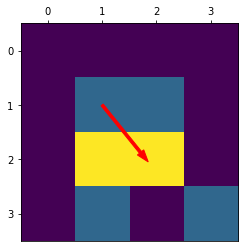

In [8]:
unit_Jx, unit_Jy = unit_J[0], unit_J[1]

plt.figure()
draw_im(I)
plt.arrow(x=1, y=1, 
          dx=unit_Jx, dy=unit_Jy, 
          width=0.05, color='red')